23:48:14 - cmdstanpy - INFO - Chain [1] start processing
23:48:32 - cmdstanpy - INFO - Chain [1] done processing


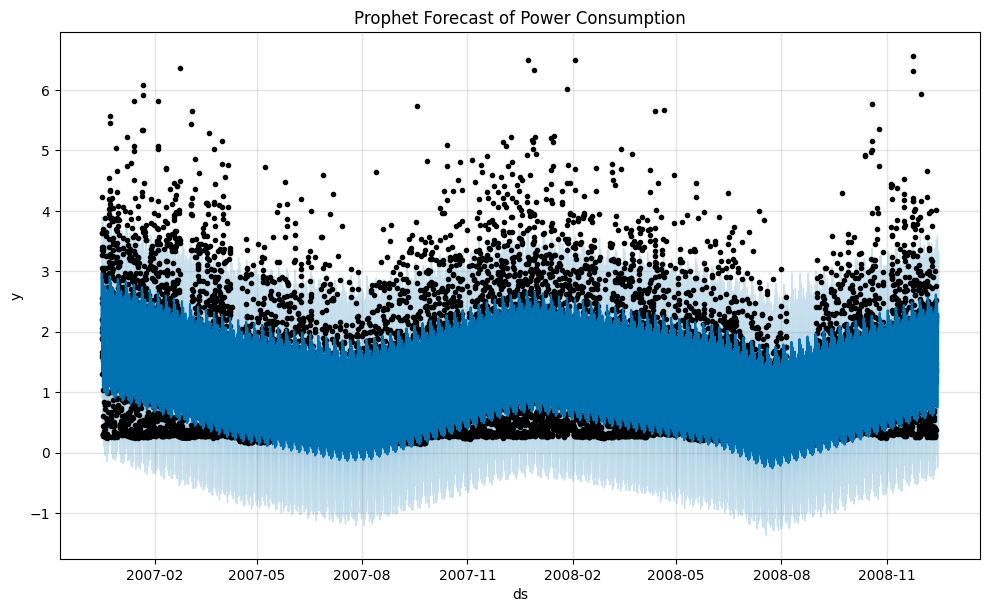

ADF Statistic: -11.451070819157685
p-value: 5.856443900093974e-21


C:\Users\saads\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saads\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

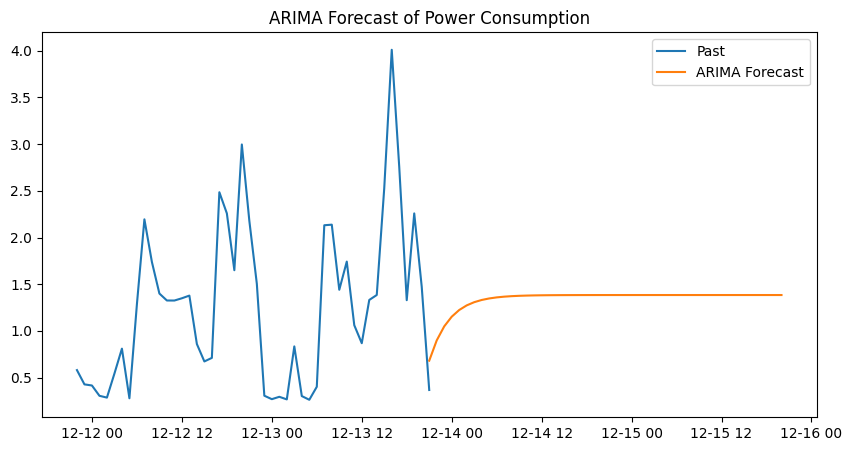

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

# ✅ 1. Load the dataset properly (CSV ka separator comma hona chahiye)
df = pd.read_csv("household_power_consumption.csv", sep=",", low_memory=False, na_values=['?'])

# ✅ 2. Combine Date and Time columns into one datetime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")

# ✅ 3. Set datetime as index for time series analysis
df.set_index("Datetime", inplace=True)

# ✅ 4. Drop unnecessary columns (focus kar rahe hain Global_active_power pe)
df = df[["Global_active_power"]].dropna()

# ✅ 5. Resample data to hourly average for smoother trend
df_hourly = df.resample("h").mean()

# ✅ 6. Prophet ke liye rename columns as required
df_prophet = df_hourly.reset_index().rename(columns={"Datetime": "ds", "Global_active_power": "y"})

# ✅ 7. Fit Prophet Model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# ✅ 8. Create future dataframe for 48-hour prediction
future = model_prophet.make_future_dataframe(periods=48, freq="h")
forecast = model_prophet.predict(future)

# ✅ 9. Plot Prophet results
model_prophet.plot(forecast)
plt.title("Prophet Forecast of Power Consumption")
plt.show()

# ✅ 10. ARIMA Model (simple setup for hourly data)
from statsmodels.tsa.stattools import adfuller

# Check stationarity
result = adfuller(df_hourly["Global_active_power"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# ✅ 11. Fit ARIMA (p=1, d=1, q=1 is starting point, tune if needed)
model_arima = ARIMA(df_hourly["Global_active_power"].dropna(), order=(1,1,1))
result_arima = model_arima.fit()

# ✅ 12. Forecast next 48 hours
forecast_arima = result_arima.forecast(steps=48)

# ✅ 13. Plot ARIMA forecast
plt.figure(figsize=(10,5))
plt.plot(df_hourly.index[-48:], df_hourly["Global_active_power"].tail(48), label="Past")
plt.plot(pd.date_range(df_hourly.index[-1], periods=48, freq="h"), forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast of Power Consumption")
plt.show()
